In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
data_21 = pd.read_csv("Data/2021.csv")
X_21 = data_21[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]]
teams = data_21.Team

In [14]:
data = pd.read_csv("Data/2000 to 2020 data.csv")

In [15]:
data.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [16]:
X = data[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]]
y = data["W"].values.reshape(-1,1)
feature_names = X.columns
print(X.shape, y.shape)

(625, 4) (625, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9102617409009789
Testing Score: 0.9087889905452938


Text(0.5, 1.0, 'Residual Plot')

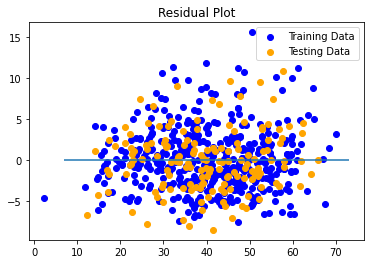

In [19]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.08280254777070063

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.27919303209681373, 'MOV/A'),
 (0.25915407072994184, 'NRtg/A'),
 (0.23375907615862868, 'DRtg/A'),
 (0.22789382101461575, 'ORtg/A')]

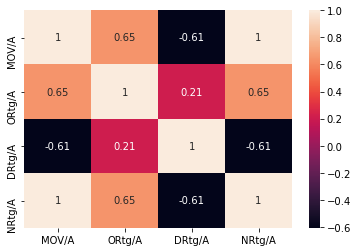

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
predictions = model.predict(X_21)
print(f"First 32 Predictions:   {predictions[:32]}")
print(f"First 32 Actual labels: {y_test[:32].tolist()}")

First 32 Predictions:   [[67.24875378]
 [58.39748759]
 [55.01512965]
 [54.68663931]
 [53.16258879]
 [50.5530447 ]
 [50.43155199]
 [46.08731777]
 [45.28433826]
 [43.50391567]
 [42.78289128]
 [41.94509975]
 [40.82214428]
 [41.16746689]
 [40.29886893]
 [40.07811976]
 [40.55277475]
 [37.87845727]
 [37.75579648]
 [37.15735132]
 [37.263211  ]
 [35.63670881]
 [30.03932598]
 [27.72915581]
 [26.19708609]
 [26.63476481]
 [25.4386792 ]
 [20.48914275]
 [20.22145659]
 [19.05573527]]
First 32 Actual labels: [[55], [45], [40], [51], [53], [43], [33], [37], [33], [59], [66], [53], [19], [49], [29], [42], [53], [36], [47], [34], [42], [59], [31], [23], [33], [35], [34], [42], [21], [32], [46], [23]]


In [24]:
pred = [x[0] for x in predictions]
preds = pd.Series(pred)
predictions_df = pd.concat([teams, preds],axis =1)
predictions_df.rename(columns = {0: "Predicted Wins"}, inplace=True)
predictions_df


,Team,Predicted Wins
0,Utah Jazz,67.248754
1,Milwaukee Bucks,58.397488
2,Phoenix Suns,55.015130
3,Los Angeles Clippers,54.686639
4,Los Angeles Lakers,53.162589
5,Brooklyn Nets,50.553045
6,Denver Nuggets,50.431552
7,Philadelphia 76ers,46.087318
8,Toronto Raptors,45.284338
9,Golden State Warriors,43.503916


[Text(-0.06, 0, ''),
 Text(-0.039999999999999994, 0, ''),
 Text(-0.019999999999999997, 0, ''),
 Text(0.0, 0, ''),
 Text(0.020000000000000004, 0, ''),
 Text(0.04000000000000001, 0, ''),
 Text(0.06, 0, '')]

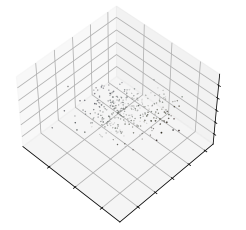

In [25]:
X1 = data[["MOV/A", "ORtg/A", "DRtg/A"]]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X1)
X1 = pca.transform(X1)

# for name, label in [('MOV/A', 0), ('ORtg/A', 1), ('DRtg/A', 2)]:
#     ax.text3D(X1[y == label, 0].mean(),
#               X1[y == label, 1].mean() + 1.5,
#               X1[y == label, 2].mean() ,name,
        #      horizontalalignment='center',
         #     bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
plt.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


In [26]:
mvp_hist = pd.read_csv("Data/MVP Data History.csv")
mvp_hist.head(100)

,Player,Age,Tm,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,MVP
0,Giannis Antetokounmpo\antetgi01,25,MIL,63,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,Y
1,Giannis Antetokounmpo\antetgi01,24,MIL,72,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,Y
2,James Harden\hardeja01,28,HOU,72,30.4,5.4,8.8,1.8,0.7,0.449,0.367,0.858,Y
3,Russell Westbrook\westbru01,28,OKC,81,31.6,10.7,10.4,1.6,0.4,0.425,0.343,0.845,Y
4,Stephen Curry\curryst01,27,GSW,79,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Keita Bates-Diop\bateske01,24,TOT,44,6.5,2.9,0.7,0.4,0.5,0.427,0.330,0.720,N
96,Keita Bates-Diop\bateske01,24,MIN,37,6.8,3.0,0.8,0.5,0.5,0.422,0.330,0.708,N
97,Keita Bates-Diop\bateske01,24,DEN,7,5.3,2.4,0.0,0.3,0.6,0.464,0.333,0.800,N
98,Nicolas Batum\batumni01,31,CHO,22,3.6,4.5,3.0,0.8,0.4,0.346,0.286,0.900,N


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
mvp_hist = mvp_hist.fillna(0)
X_mvp = mvp_hist[["Age", "PTS", "TRB", "AST", "STL", "BLK", "FG%", "3P%", "FT%"]]
y_df=pd.get_dummies(mvp_hist["MVP"], drop_first=True)
#print(y_df)
y_mvp = y_df["Y"].values.reshape(-1,1)
X_mvp_train, X_mvp_test, y_mvp_train, y_mvp_test = train_test_split(X_mvp, y_mvp, random_state=42)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_mvp_train, y_mvp_train)
mvp_prob=clf.predict_proba(X_mvp_test)
mvp_predict=clf.predict(X_mvp_test)
mvp_score=clf.score(X_mvp_test, y_mvp_test)
print(mvp_prob)
print(mvp_predict)
print(mvp_score)


[[9.99985272e-01 1.47275484e-05]
 [9.99989342e-01 1.06579470e-05]
 [5.32308051e-01 4.67691949e-01]
 [1.64529809e-01 8.35470191e-01]
 [9.99993348e-01 6.65230925e-06]
 [9.99998794e-01 1.20621098e-06]
 [9.99984688e-01 1.53124325e-05]
 [9.99990177e-01 9.82269538e-06]
 [9.99968695e-01 3.13047513e-05]
 [9.99756429e-01 2.43570927e-04]
 [9.99949746e-01 5.02540915e-05]
 [9.99948742e-01 5.12583629e-05]
 [9.99999757e-01 2.42962090e-07]
 [9.99968307e-01 3.16927952e-05]
 [9.99457969e-01 5.42031176e-04]
 [9.94981774e-01 5.01822575e-03]
 [9.99995984e-01 4.01616769e-06]
 [9.86605926e-01 1.33940741e-02]
 [9.99992146e-01 7.85404336e-06]
 [9.99999477e-01 5.23014905e-07]
 [9.99876852e-01 1.23147607e-04]
 [9.99985547e-01 1.44528627e-05]
 [9.99995340e-01 4.65953734e-06]
 [9.99997214e-01 2.78587412e-06]
 [9.99969801e-01 3.01985155e-05]
 [9.93349396e-01 6.65060415e-03]
 [9.99995708e-01 4.29188769e-06]
 [2.67808515e-03 9.97321915e-01]
 [9.99980719e-01 1.92810065e-05]
 [9.99991404e-01 8.59640634e-06]
 [9.190447

In [28]:
current_year = pd.read_csv("Data/Current_Season_Stats.csv")
current_year.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,35,2,14.0,2.4,4.1,...,0.543,1.3,2.7,4.0,0.6,0.4,0.5,0.9,1.7,6.1
1,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams\adamsst01,C,27,NOP,33,33,27.8,3.5,5.7,...,0.443,4.0,4.9,8.9,2.1,0.9,0.6,1.5,1.9,8.0
3,4,Bam Adebayo\adebaba01,C,23,MIA,33,33,33.9,7.2,12.7,...,0.847,2.2,7.3,9.5,5.4,0.9,1.0,3.0,2.4,19.2
4,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,...,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7


In [29]:
clean_stats = current_year[["Age", "PTS", "TRB", "AST", "STL", "BLK", "FG%", "3P%", "FT%"]]
clean_stats = clean_stats.fillna(0)

In [30]:
mvp_21_prediction = clf.predict(clean_stats)
print(mvp_21_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [31]:
mvp_prob=clf.predict_proba(clean_stats)
print(mvp_prob)
y_probability=[]
n_probability=[]
for prob in mvp_prob:
    y_probability.append(prob[1])
    n_probability.append(prob[0])
players = current_year["Player"].tolist()
df=pd.DataFrame({"Player": players, "prediction": mvp_21_prediction, "mvp prob": y_probability})
df

[[9.99913339e-01 8.66612303e-05]
 [9.99979626e-01 2.03739238e-05]
 [9.99860144e-01 1.39856416e-04]
 ...
 [7.44486018e-01 2.55513982e-01]
 [9.99934163e-01 6.58372424e-05]
 [9.99910069e-01 8.99306082e-05]]


,Player,prediction,mvp prob
0,Precious Achiuwa\achiupr01,0,0.000087
1,Jaylen Adams\adamsja01,0,0.000020
2,Steven Adams\adamsst01,0,0.000140
3,Bam Adebayo\adebaba01,0,0.148121
4,LaMarcus Aldridge\aldrila01,0,0.000009
...,...,...,...
507,Delon Wright\wrighde01,0,0.000512
508,Thaddeus Young\youngth01,0,0.000355
509,Trae Young\youngtr01,0,0.255514
510,Cody Zeller\zelleco01,0,0.000066


In [32]:
df=df.sort_values(by=["mvp prob"],ascending=False)
df["mvp prob"] = df["mvp prob"].map(lambda x: round(x * 100, 2))
df
df.to_csv("Data/MVP_prediction.csv")

In [33]:
roy_hist = pd.read_csv("Data/Rookies of the year.csv")
roy_hist.head()

,Player,MP,PTS,TRB,AST,ROY
0,Ja Morant\moranja01,31.0,17.8,3.9,7.3,Y
1,Luka Dončić\doncilu01,32.2,21.2,7.8,6.0,Y
2,Ben Simmons\simmobe01,33.7,15.8,8.1,8.2,Y
3,Malcolm Brogdon\brogdma01,26.4,10.2,2.8,4.2,Y
4,Karl-Anthony Towns\townska01,32.0,18.3,10.5,2.0,Y


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
roy_hist = roy_hist.fillna(0)
X_roy = roy_hist[["MP", "PTS", "TRB", "AST"]]
roy_y_df=pd.get_dummies(roy_hist["ROY"], drop_first=True)
#print(roy_y_df)
y_roy = roy_y_df["Y"].values.reshape(-1,1)
X_roy_train, X_roy_test, y_roy_train, y_roy_test = train_test_split(X_roy, y_roy, random_state=42)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_roy_train, y_roy_train)
roy_prob=clf.predict_proba(X_roy_test)
roy_predict=clf.predict(X_roy_test)
roy_score=clf.score(X_roy_test, y_roy_test)
print(roy_prob)
print(roy_predict)
print(roy_score)

[[0.9702887  0.0297113 ]
 [0.82387247 0.17612753]
 [0.99619147 0.00380853]
 [0.01446944 0.98553056]
 [0.98761553 0.01238447]
 [0.75014395 0.24985605]
 [0.97642097 0.02357903]
 [0.99413094 0.00586906]
 [0.73584234 0.26415766]
 [0.97390441 0.02609559]
 [0.87045712 0.12954288]
 [0.99611339 0.00388661]
 [0.59254537 0.40745463]
 [0.93785065 0.06214935]
 [0.05045653 0.94954347]
 [0.05291391 0.94708609]
 [0.92693458 0.07306542]
 [0.99509212 0.00490788]
 [0.00214909 0.99785091]
 [0.99564522 0.00435478]
 [0.9851349  0.0148651 ]
 [0.98940244 0.01059756]
 [0.98210544 0.01789456]
 [0.04719097 0.95280903]
 [0.02675253 0.97324747]
 [0.97288842 0.02711158]
 [0.99282539 0.00717461]
 [0.9958973  0.0041027 ]
 [0.99083326 0.00916674]
 [0.98068058 0.01931942]
 [0.49696454 0.50303546]
 [0.98710056 0.01289944]
 [0.146036   0.853964  ]
 [0.08424993 0.91575007]
 [0.22744179 0.77255821]
 [0.24601035 0.75398965]
 [0.99599844 0.00400156]
 [0.99480394 0.00519606]
 [0.88584023 0.11415977]
 [0.88364437 0.11635563]


In [35]:
current_rookies=pd.read_csv("Data/current rookies.csv")
current_rookies.head()

,Player,Age,Yrs,MP,PTS,TRB,AST
0,Precious Achiuwa\achiupr01,21,1,14.0,6.1,4.0,0.6
1,Ty-Shon Alexander\alexaty01,22,1,2.7,0.0,0.3,0.3
2,Cole Anthony\anthoco01,20,1,26.7,11.0,4.4,3.8
3,Deni Avdija\avdijde01,20,1,21.5,5.9,4.7,1.3
4,Udoka Azubuike\azubuud01,21,1,4.1,1.0,1.1,0.0


In [36]:
clean_rookies = current_rookies[["MP", "PTS", "TRB", "AST"]]
clean_rookies = clean_rookies.fillna(0)
clean_rookies

,MP,PTS,TRB,AST
0,14.0,6.1,4.0,0.6
1,2.7,0.0,0.3,0.3
2,26.7,11.0,4.4,3.8
3,21.5,5.9,4.7,1.3
4,4.1,1.0,1.1,0.0
...,...,...,...,...
72,28.5,10.2,4.8,1.2
73,19.0,6.3,4.1,1.3
74,7.3,2.2,0.7,1.0
75,20.8,11.8,5.9,0.7


In [37]:
roy_21_prediction = clf.predict(clean_rookies)
print(roy_21_prediction)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [38]:
roy_prob=clf.predict_proba(clean_rookies)
print(roy_prob)
y_probability=[]
n_probability=[]
for prob in roy_prob:
    y_probability.append(prob[1])
    n_probability.append(prob[0])
rookie = current_rookies["Player"].tolist()
roy_df=pd.DataFrame({"Player": rookie, "prediction": roy_21_prediction, "ROY_prob": y_probability})
roy_df

[[0.96629305 0.03370695]
 [0.99620721 0.00379279]
 [0.68484487 0.31515513]
 [0.95106955 0.04893045]
 [0.99614287 0.00385713]
 [0.16550808 0.83449192]
 [0.95062832 0.04937168]
 [0.92895526 0.07104474]
 [0.99636591 0.00363409]
 [0.99611122 0.00388878]
 [0.97697106 0.02302894]
 [0.99692775 0.00307225]
 [0.99369162 0.00630838]
 [0.73630594 0.26369406]
 [0.9943009  0.0056991 ]
 [0.99313762 0.00686238]
 [0.9960913  0.0039087 ]
 [0.99564381 0.00435619]
 [0.99088883 0.00911117]
 [0.99622656 0.00377344]
 [0.46088711 0.53911289]
 [0.99351307 0.00648693]
 [0.9926085  0.0073915 ]
 [0.99639825 0.00360175]
 [0.954643   0.045357  ]
 [0.99636248 0.00363752]
 [0.99622175 0.00377825]
 [0.99583735 0.00416265]
 [0.99013164 0.00986836]
 [0.97881296 0.02118704]
 [0.9963829  0.0036171 ]
 [0.99394605 0.00605395]
 [0.95864556 0.04135444]
 [0.98178037 0.01821963]
 [0.89728442 0.10271558]
 [0.99510706 0.00489294]
 [0.98024852 0.01975148]
 [0.99630667 0.00369333]
 [0.98823967 0.01176033]
 [0.9816466  0.0183534 ]


,Player,prediction,ROY_prob
0,Precious Achiuwa\achiupr01,0,0.033707
1,Ty-Shon Alexander\alexaty01,0,0.003793
2,Cole Anthony\anthoco01,0,0.315155
3,Deni Avdija\avdijde01,0,0.048930
4,Udoka Azubuike\azubuud01,0,0.003857
...,...,...,...
72,Patrick Williams\willipa01,0,0.082934
73,Dylan Windler\windldy01,0,0.046039
74,Cassius Winston\winstca01,0,0.006202
75,James Wiseman\wisemja01,0,0.203707


In [39]:
roy_df=roy_df.sort_values(by=["ROY_prob"],ascending=False)
roy_df["ROY_prob"] = roy_df["ROY_prob"].map(lambda x: round(x * 100, 2))
roy_df



,Player,prediction,ROY_prob
5,LaMelo Ball\ballla01,1,83.45
20,Tyrese Haliburton\halibty01,1,53.91
2,Cole Anthony\anthoco01,0,31.52
13,Anthony Edwards\edwaran01,0,26.37
75,James Wiseman\wisemja01,0,20.37
...,...,...,...
61,Cassius Stanley\stanlca01,0,0.35
58,Nick Richards\richani01,0,0.34
71,Greg Whittington\whittgr01,0,0.34
59,Deividas Sirvydis\sirvyde01,0,0.34


In [40]:
roy_df.to_csv("Data/ROY_prediction.csv")